# Part I - GHO Life Expectancy Data Exploration
## by Miracle Abraham


## Introduction

This project explores data from Life Expectancy variables extracted from the World Health Organization's [Global Health Observatory](https://www.who.int/data/gho) repository. The GHO tracks 20 demography-dependent, critical, and representative health-related factors for 193 countries between the years 2000 and 2015. </br>

This version of the dataset was obtained from a [Kaggle repository](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) made available by [Kumar Rajarshi](https://www.kaggle.com/kumarajarshi). In the earlier collection and cleaning process, the data has been extracted and combined from multiple sources in the GHO repository. Fields and Countries with large amounts of missing information have also been dropped from the raw dataset.
</br>



## Preliminary Wrangling


In [24]:
# Importing all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [25]:
# Loading the csv file into a DataFrame and viewing its first few rows

life_expectancy = pd.read_csv('life_expectancy_data.csv')
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [26]:
# Viewing information about the data

life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [27]:
# Checking for duplicate data

life_expectancy[life_expectancy.duplicated()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [28]:
# Viewing summary statistics of the DataFrame

life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [29]:
# Checking for null values

life_expectancy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

The data overview points to a need for minor wrangling. To ensure the safety of the original dataframe, I will create a backup copy of its original form.

In [30]:
# Creating a backup copy of the life expectancy DataFrame

life_expectancy_backup = life_expectancy.copy()

### Wrangling Task 1 - Renaming the columns

The Column names have leading spaces, mixed caps in the letters and hyphens. These names don't conform to best practices, and the characters will make it difficult to access the columns through dot notation. I will change all names to lowercase and replace all spaces and special characters with underscores.

In [31]:
# Creating a for loop to write the new column names into an empty list

old = list(life_expectancy.columns)
new_name = []

for name in old:
    new = name.strip().lower()
    new = new.replace(' ', '_').replace('-', '_')
    new_name.append(new)
    
print(new_name)

['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1_19_years', 'thinness_5_9_years', 'income_composition_of_resources', 'schooling']


In [32]:
# Assigning the new names to the Dataframe and viewing the result

life_expectancy.columns = new_name
life_expectancy.head(1)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1


### Wrangling Task 2 - Dealing with null values

In [33]:
# Subsetting the countries with null values and checking their frequencies

any_null = life_expectancy[life_expectancy.isnull().any(axis = 1)]

any_null['country'].value_counts()[:20]

New Zealand                                             16
Libya                                                   16
Saudi Arabia                                            16
Congo                                                   16
Saint Lucia                                             16
Cuba                                                    16
Saint Vincent and the Grenadines                        16
Czechia                                                 16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Denmark                                                 16
Norway                                                  16
South Sudan                                             16
Egypt                                                   16
Oman                                                    16
United Kingdom of Great Britain and Northern Ireland    16
Lao People's Democratic Republic                        

This shows that as suspected, the some countries have certain fields missing from all entries of their data.

In [34]:
# Rerunning a null value check for the columns

life_expectancy.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

From the `.isnull().sum()` check, `population`, `hepatitis_b` and `gdp` have the highest counts of missing values.

[Information from the WHO](https://www.who.int/europe/news-room/fact-sheets/item/hepatitis-b) shows that not all countries had universal Hepatitis B immunization during the period the covered by the data, so the null values are expected for that field. It's a potential feature of interest in determining life expectancy, so I will keep the column.

The reason for the large amount of missing data in the `population` column isn't as easily explainable, and it doesn't pose a  question so direct that the GDP per capita cannot answer, so I will drop the column. and explore `gdp` further.

In [35]:
# Dropping the population column

life_expectancy.drop(columns = 'population', inplace = True)

In [36]:
# Subsetting the countries with null gdp values and checking their frequencies

null_gdp = life_expectancy[life_expectancy['gdp'].isnull()]

null_gdp['country'].value_counts()

Bahamas                                                 16
Micronesia (Federated States of)                        16
Viet Nam                                                16
Venezuela (Bolivarian Republic of)                      16
United States of America                                16
United Republic of Tanzania                             16
United Kingdom of Great Britain and Northern Ireland    16
The former Yugoslav republic of Macedonia               16
Slovakia                                                16
Saint Vincent and the Grenadines                        16
Saint Lucia                                             16
Republic of Moldova                                     16
Republic of Korea                                       16
Bolivia (Plurinational State of)                        16
Yemen                                                   16
Gambia                                                  16
Iran (Islamic Republic of)                              

The summary statistics don't show a forthcoming explanantion for the missing gdp values, but I will retain the column because of its importance to life expectancy, the primary response variable.

In [37]:
# Rechecking the null values

life_expectancy.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
thinness__1_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [38]:
# Checking the countries with null life expectancies
no_le = life_expectancy[life_expectancy['life_expectancy'].isna() == True]
no_le

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,0,98.0,3.58,98.0,0.1,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,0,96.0,5.58,96.0,0.1,722.756650,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,0,79.0,17.24,79.0,0.1,3617.752354,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,0,87.0,4.65,87.0,0.1,136.183210,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,0,99.0,7.20,99.0,0.1,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,0,99.0,9.27,99.0,0.1,1932.122370,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,0,96.0,6.14,96.0,0.1,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,0,9.0,16.61,9.0,0.1,3542.135890,0.2,0.1,NaN,0.0


In [39]:
# Checking the frequency of the countries
life_expectancy[life_expectancy['country'].isin(no_le['country'])]['country'].value_counts()

Cook Islands             1
Dominica                 1
Marshall Islands         1
Monaco                   1
Nauru                    1
Niue                     1
Palau                    1
Saint Kitts and Nevis    1
San Marino               1
Tuvalu                   1
Name: country, dtype: int64

These countries with missing life expectancies have only one occurrence each in the dataset, and don't offer much data. To avoid having them skew the values, I will drop them. 

In [40]:
# Dropping rows with null life expectancy
life_expectancy.dropna(subset = ['life_expectancy'], axis = 0, inplace = True)

### Wrangling Task 3 - Dropping unneeded fields

To ensure a high-quality exploration, I will also drop columns that contain duplicate information or don't hold a feature of interest to determining life expectancy.

> Here is a list of these columns and the justification for their removal:

* `population` - Null values
* `income_composition_of_resources` - No direct correlation with response variable
* `under_five_deaths` - Information is contained under `infant_deaths`
* `hiv/aids`, `thinness__1_19_years`, `thinness_5_9_years` - No direct correlation with response variable

In [41]:
# Dropping the specified columns

life_expectancy.drop(columns = ['income_composition_of_resources', 'under_five_deaths',
                                'hiv/aids', 'thinness__1_19_years', 'thinness_5_9_years'], inplace = True)

### Wrangling Task 4 - Converting the `status` column to a dummy variable

For ease of accessing descriptive statistics, I will convert the nominal values from the `status` column into numerical dummy variables.

In [42]:
# Replacing the values with 0 and 1

life_expectancy['status'] = life_expectancy['status'].replace('Developing', 0).replace('Developed', 1)

In [43]:
life_expectancy.rename(columns = {'status': 'is_developed'}, inplace = True)

In [44]:
# Checking the replaced values

life_expectancy['is_developed'].value_counts()

0    2416
1     512
Name: is_developed, dtype: int64

In [83]:
# Saving the wrangled dataset

life_expectancy.to_csv('life_expectancy_wrangled.csv', index = False)

### What is the structure of your dataset?


> The dataset contains 2,938 data points spanning up to 15 years for 193 countries. The fields in the dataset include:

* __Country__ - Country of interest
* __Year__ - Year of data collection
* __Is Developed__ - Dummy variables with 0 indicating a developing country and 1 indicating a developed one
* __Life Expectancy__ - Average life expectancy of residents at birth
* __Adult Mortality Rates__ - Probability of residents dying between 15 and 60 years per 1000 people
* __Infant Deaths__ - Number of Infant Deaths per 100,000 members of the population
* __Alcohol__ - Number of litres of pure alcohol consumed per capita
* __Percentage Expenditure__ - Expenditure on health as a percentage of the country's Gross Domestic Product per capita
* __Hepatitis B__ - Pecentage of Hepatitis B (HepB) immunization coverage among 1-year-olds
* __Measles__ - Number of reported cases of measles in the population
* __BMI__ - Average body mass index of the population
* __Polio__ - Percentage of Polio (Pol3) immunization coverage among 1-year-olds
* __Total Expenditure__ - Government expenditure on health as a percentage of total government expenditure
* __Diphtheria__ - Percentage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds
* __GDP__ - Gross Domestic Product per capita (in USD)
*  __Schooling__ - Average number of years of schooling for residents in the country

The `country` column is a nominal variable, while `status`is a dummy variable. All other fields contain numerical data.
</br>
</br>

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in exploring the trend of life expectancy over the 15 years of data coverage. I would also like to examine the impact of various economic and health-related features on the life expectancy in devoloping countries as opposed to deveoped ones.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will base my investigation on the changes in `life_expectancy` over the `year` column. The `gdp`, `total_expenditure`, and `percentage_expenditure` and other metrics will offer insights into the corellation of those changes with economy-related metrics. I will also check how these changes differ between developing and developed countries.

## Univariate Exploration

First, I will plot a FacetGrid of the variables in this dataset for a generalised overview.

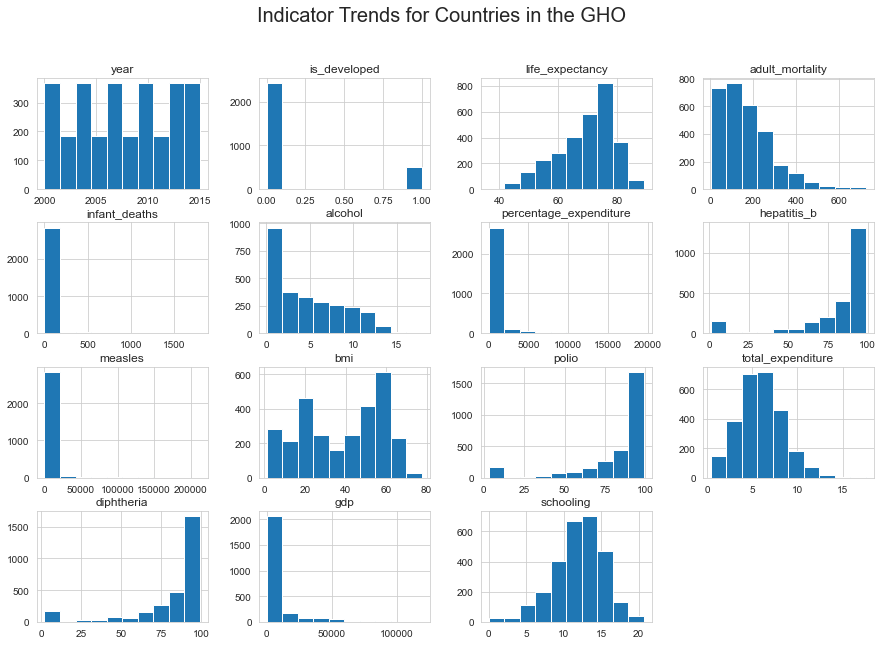

In [46]:
# Plotting histograms of the life expectancy variables
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 15,10

life_expectancy.hist()
plt.suptitle('Indicator Trends for Countries in the GHO', fontsize = 20);

The overwiew shows that higer life expectancies are more common, with the mode of the distribution at almost 80years. There are many more developing countries than developed ones, and it'll be insightful to see how variables differ for both groups. Adult mortality is generally lower than 300 deaths per 1000 people, while infant mortality appears to be even less, with most countries recording less than 200 deaths per 1000 infants. </br>

The rates for immunization against Hepatitis B, Diphtheria, and Polio are high, while the rates of measles occurrence appears low. However, `percentage_expenditure`, `infant_deaths`, `gdp` and `measles` have outlier values that are obscured by the scales of lower values with much higher counts. An axis transformation may help make the distributions much clearer. The BMI distribution is slightly bimodal, with a major peak around 60 and a minor one around 20. </br>

The I will investigate these variables further, especially in relation to their changes over time, and how they differ between developed and developing countries.

### Question: How has life expectancy changed over time?

In [47]:
# Checking the mean life expectancy per year

life_expectancy.groupby('year')['life_expectancy'].mean()

year
2000    66.750273
2001    67.128962
2002    67.351366
2003    67.433333
2004    67.646448
2005    68.209290
2006    68.667760
2007    69.036066
2008    69.427869
2009    69.938251
2010    70.048634
2011    70.654098
2012    70.916940
2013    71.236066
2014    71.536612
2015    71.616940
Name: life_expectancy, dtype: float64

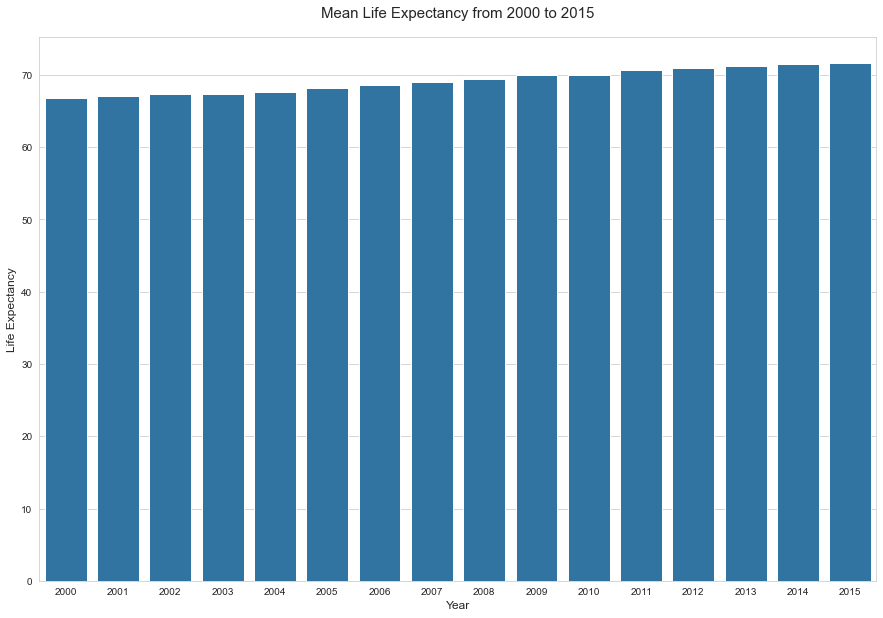

In [48]:
# Plotting the mean values

base = sns.color_palette()[0]
sns.barplot(x = 'year', y = 'life_expectancy', data = life_expectancy, color = base, ci = False)
plt.title('Mean Life Expectancy from 2000 to 2015', fontsize = 15, y=1.025)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Life Expectancy', fontsize = 12);

The metrics and barplot show that lifeexpectancy has generally increased over time, such that at 2015, the last year in this dataset, the average life expectancy was as high as 71.6 years, almost 5 years higher than the 66.7-year average in 2000. </br>

However, a lot of data is obscured with minimal mean increases per year in the barplot, so I'll use a regression plot to visualise the data better.

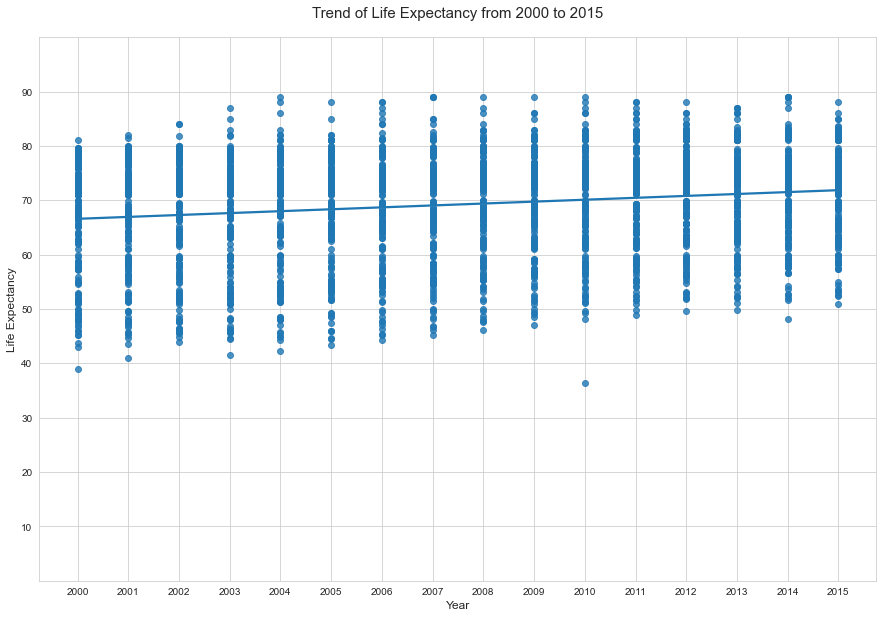

In [49]:
# Creating a regression plot of the life expectancy trend
plt.ylim(0,100)
xticks = np.arange(2000, 2016, 1)
xlabels = ['{}'.format(val) for val in xticks]
yticks = np.arange(10, 100, 10)
ylabels = ['{}'.format(val) for val in yticks]

sns.regplot(x = 'year', y = 'life_expectancy', data = life_expectancy, ci = False)
plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)
plt.title('Trend of Life Expectancy from 2000 to 2015', fontsize = 15, y=1.025)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Life Expectancy', fontsize = 12);

The regression plot proves that according to the initial observation from the barplot, the life expectancy of nearly all countries have, in fact, increased with time. It shows that most countries had a life expectancy of 45-80 years in the early 2000s, and 50-85 years in the late 2000s. However, there are outlier values of as low as 35 years or as high as 90.</br>

First, I'll explore the distribution of values that were obscured in the grid histogram on a transformed scale. Then, I'll explore the outlier values of life expectancy, the difference of the life expectancy trends between developed and developing countries, as well its correlation with other potential predictive variables.

### Question: What countries have the highest and lowest average life expectancies?

In [50]:
# Grouping the dataframe by country and subsetting the life expectancy

by_country = life_expectancy.groupby('country')['life_expectancy'].mean()
top_20 = by_country.sort_values(ascending = False)[:20]
bottom_20 = by_country.sort_values(ascending = False)[-20:]

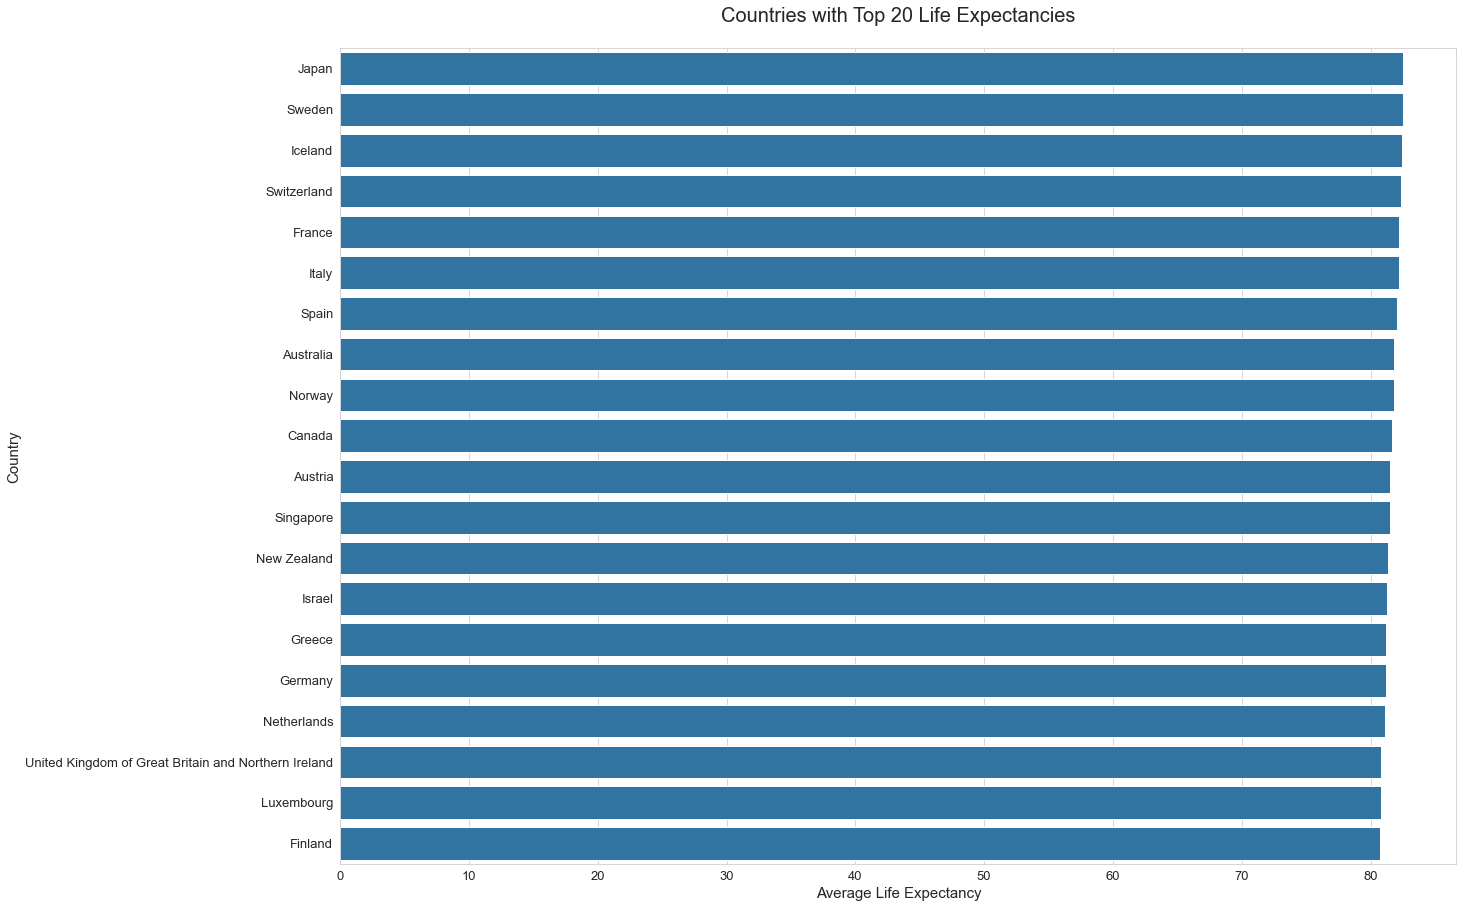

In [51]:
# Plotting the average life expectancy of the top 20 countries
plt.rcParams['figure.figsize'] = 20, 15

sns.barplot(y = top_20.index, x= top_20.values, data = life_expectancy, color = base)
plt.title('Countries with Top 20 Life Expectancies', fontsize = 20, y=1.025)
plt.ylabel('Country', fontsize = 15)
plt.xlabel('Average Life Expectancy', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13);

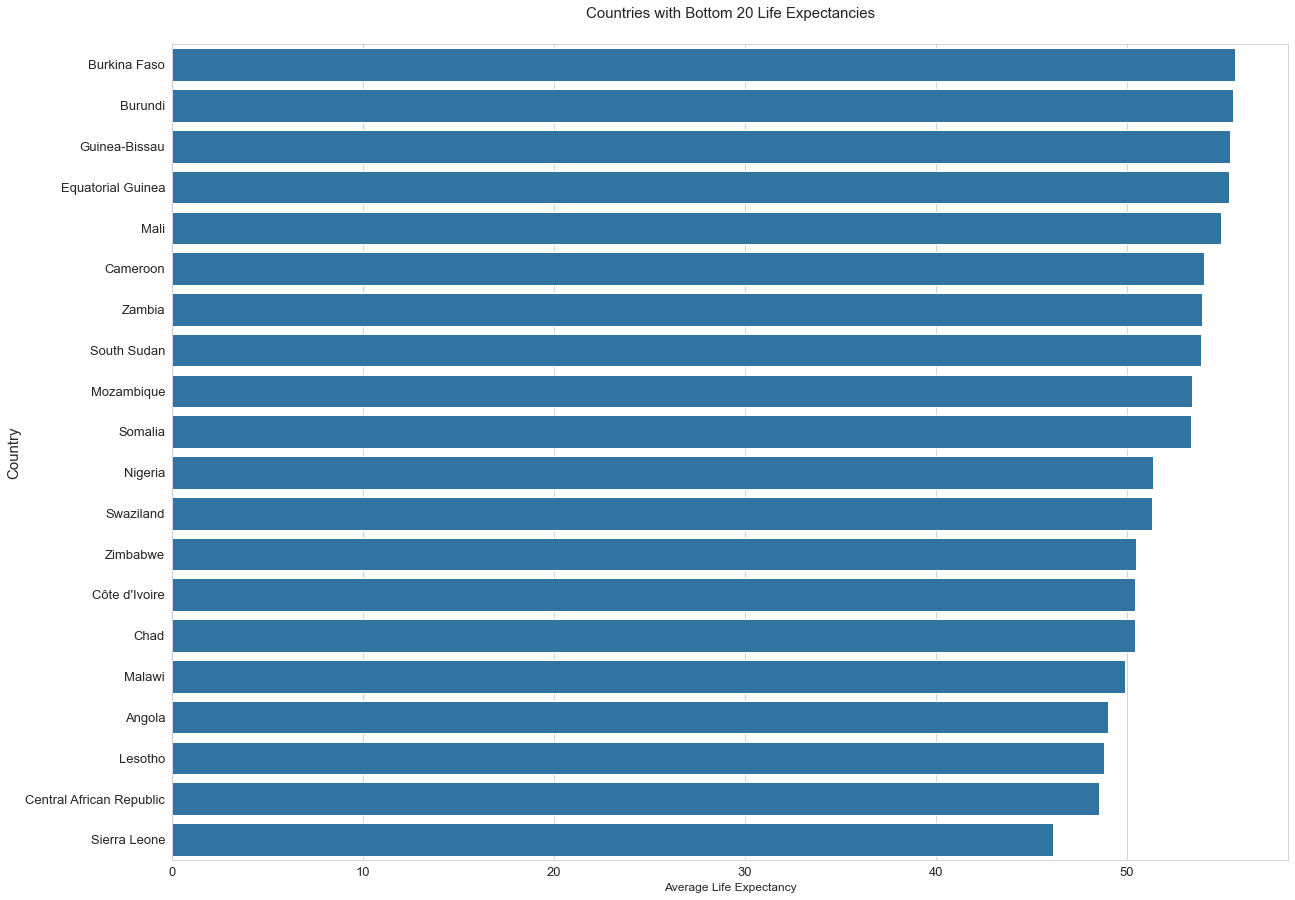

In [52]:
# Plotting the average life expectancy of the top 20 countries

sns.barplot(y = bottom_20.index, x= bottom_20.values, data = life_expectancy, color = base)
plt.title('Countries with Bottom 20 Life Expectancies', fontsize = 15, y=1.025)
plt.ylabel('Country', fontsize = 15)
plt.xlabel('Average Life Expectancy', fontsize = 12)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13);

The barplots look cluttered, creating [a Moire effect](https://en.wikipedia.org/wiki/Moir%C3%A9_pattern) that obscures the differences between the life expectancy of these countries. I'll use a [lollipop plot](https://www.data-to-viz.com/graph/lollipop.html) instead, modeled after reproducible matplotlib code from the [Python Graph Gallery](https://www.python-graph-gallery.com/182-vertical-lollipop-plot). 

In [53]:
# Changing the order of the Series

top_20 = top_20.sort_values()
bottom_20 = bottom_20.sort_values()

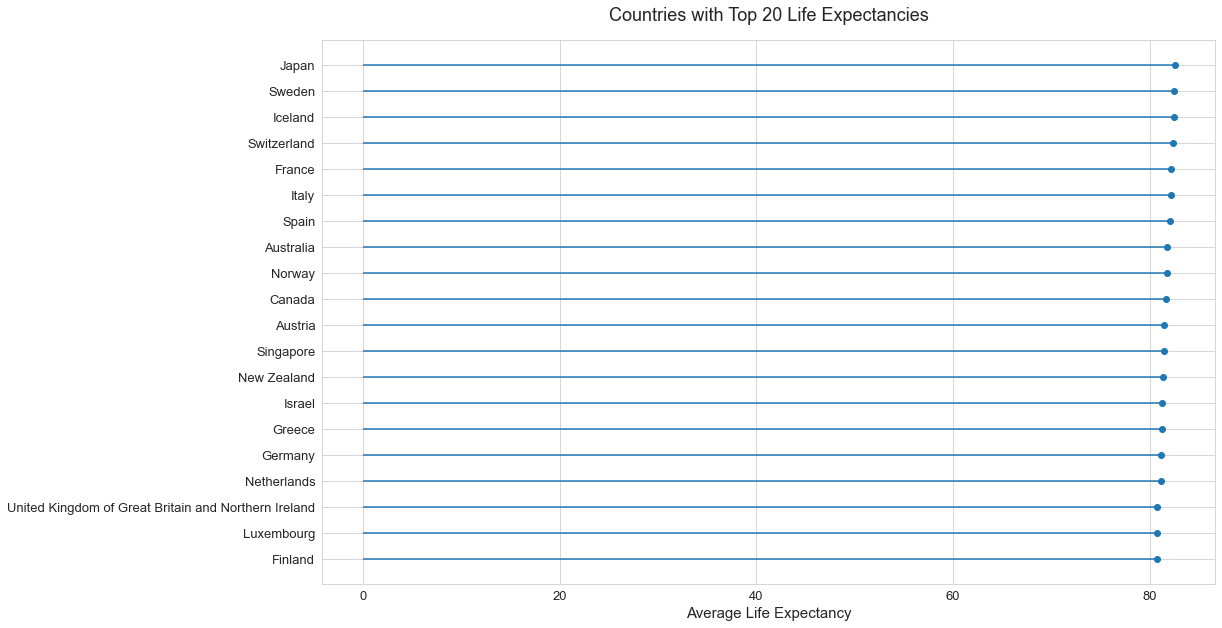

In [54]:
# Creating a lollipop plot of the top 20 data

plt.rcParams['figure.figsize'] = 16, 10
my_range = range(1, len(top_20.values)+1)
plt.hlines(y = my_range, xmin = 0, xmax = top_20.values)
plt.plot(top_20.values, my_range, 'o')
plt.yticks(my_range, top_20.index, fontsize = 13)
plt.xticks(fontsize = 13)
plt.title('Countries with Top 20 Life Expectancies', fontsize = 18, y=1.025)
plt.xlabel('Average Life Expectancy', fontsize = 15);


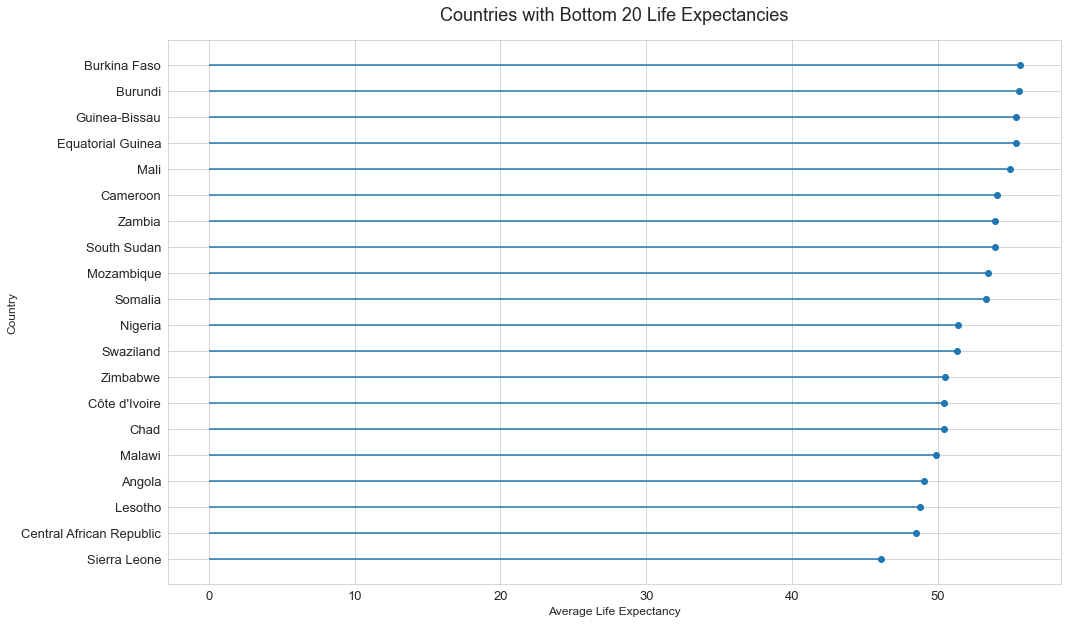

In [55]:
# Creating a lollipop plot of the bottom 20 data

my_range = range(1, len(bottom_20.values)+1)
plt.hlines(y = my_range, xmin = 0, xmax = bottom_20.values)
plt.plot(bottom_20.values, my_range, 'o')
plt.yticks(my_range, bottom_20.index, fontsize = 13)
plt.xticks(fontsize = 13)
plt.title('Countries with Bottom 20 Life Expectancies', fontsize = 18, y=1.025)
plt.ylabel('Country', fontsize = 12)
plt.xlabel('Average Life Expectancy', fontsize = 12);


The clearer lollipop plots show that All of the top 20 countries have life expectancies greater than 80, so the bar plot shows little difference between them

### Question: What is the distribution of infant deaths on a transformed scale?

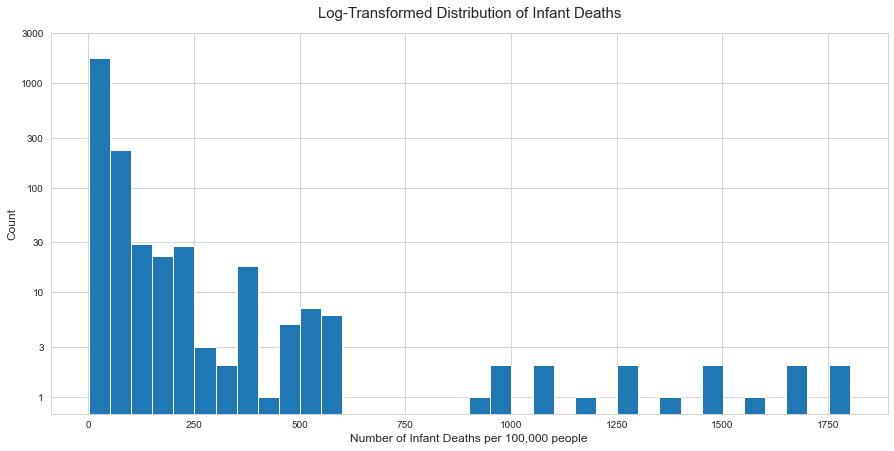

In [56]:
# Plotting a log-transformed histogram of the distribution
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
labs = ['{}'.format(val) for val in ticks]
plt.rcParams['figure.figsize'] = 15, 7
sns.set_style('whitegrid')


plt.hist(x = 'infant_deaths', data = life_expectancy, bins = np.arange(1, life_expectancy['infant_deaths'].max()+50, 50))
plt.yscale('log')
plt.yticks(ticks, labs)
plt.title('Log-Transformed Distribution of Infant Deaths', fontsize = 15, y=1.025)
plt.xlabel('Number of Infant Deaths per 100,000 people', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

The log-transformed plot shows a small number of outliers scattered across the higher values of infant death. It might be interesting investigate the country/countries with such high counts of infant deaths and its effect on life expectancy.

In [57]:
# Subsetting the data with high infant deaths
high_i_d = life_expectancy[life_expectancy['infant_deaths'] > 1000]

high_i_d['country'].value_counts()

India    13
Name: country, dtype: int64

India is the only country with such high values of infant deaths! Finding out the reason for the death will require more data and insights, but from the available data, I'll view how the country's distribution of life expectancy differs from the general trend during bivariate exploration.

### Question: What is the trend for percentage expenditure on a transformed scale?

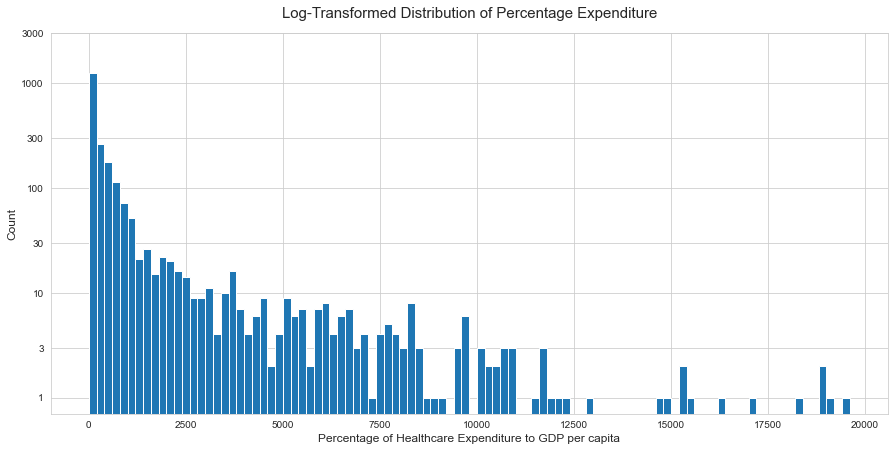

In [58]:
# Plotting a log-transformed histogram of the trend

ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
labs = ['{}'.format(val) for val in ticks]

plt.hist(x = 'percentage_expenditure', data = life_expectancy, bins = np.arange(1, life_expectancy['percentage_expenditure'].max()+200, 200))
plt.yscale('log')
plt.yticks(ticks, labs)
plt.title('Log-Transformed Distribution of Percentage Expenditure', fontsize = 15, y=1.025)
plt.xlabel('Percentage of Healthcare Expenditure to GDP per capita', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

The histogram shows that high healthcare expenditure is much less common. This is expected, as the GDP per capita determines the general standard of living, and by extension, the amount of disposable income that residents can spend on healthcare </br>

In a nation with a low GDP, the percentage of revenue available for health-relating spending may be reduced. In countries with high GDPs, on the other hand, the denominator for the Expenditure to GDP per capita ratio reduces the overall percentage, bringing the value closer to that of low-GDP economies.</br>

However, it might be interesting to visualise the life expectancy of the high healthcare expenditure countries in comparison to the lower ones. I will split the dataset at the halfway mark of 10000% per GDP per capita, and visualise the life expectancy of both countries.

### Question: What is the distribution for GDP per capita on a transformed scale?

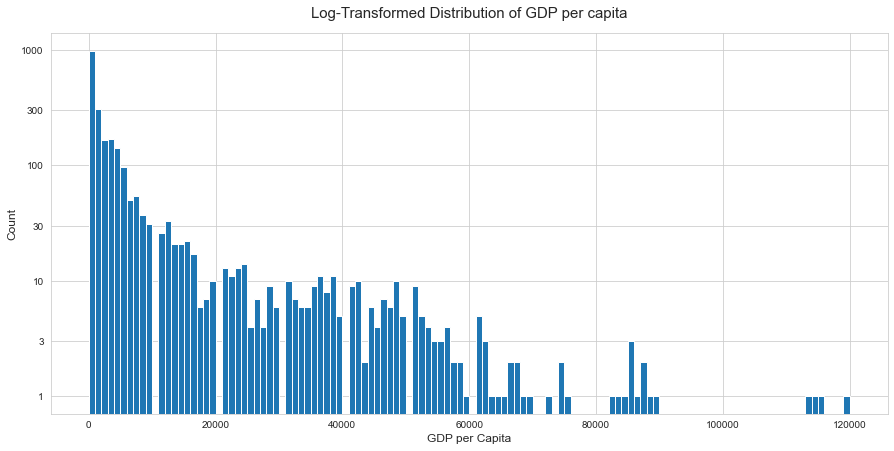

In [59]:
# Plotting a log-transformed histogram of the trend
ticks = [1, 3, 10, 30, 100, 300, 1000]
labs = ['{}'.format(val) for val in ticks]

plt.hist(x = 'gdp', data = life_expectancy, bins = np.arange(1, life_expectancy['gdp'].max()+1000, 1000))
plt.yscale('log')
plt.yticks(ticks, labs)
plt.title('Log-Transformed Distribution of GDP per capita', fontsize = 15, y=1.025)
plt.xlabel('GDP per Capita', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

In [60]:
# Checking the correlation of gdp with life expectancy

life_expectancy['life_expectancy'].corr(life_expectancy['gdp'])

0.4614551926207384

The log-transformed histogram shows the distribution of gdps more clearly. The downward trend of gdps is more apparent, with very few high-value outliers, as expected. GDP has a strong correlation with life expectancy, so it is expected that the overall life expectancy will increase with the GDP per capita.

### Question: What is the difference in proportion of developed and developing countries in the GHO dataset?

In [61]:
# Checking the summary statistics of the is_developed column

life_expectancy.describe()['is_developed']

count    2928.000000
mean        0.174863
std         0.379915
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: is_developed, dtype: float64

In [62]:
# Checking the number of countries in each status group

country_status = life_expectancy.groupby('is_developed')['country'].nunique()
country_status

is_developed
0    151
1     32
Name: country, dtype: int64

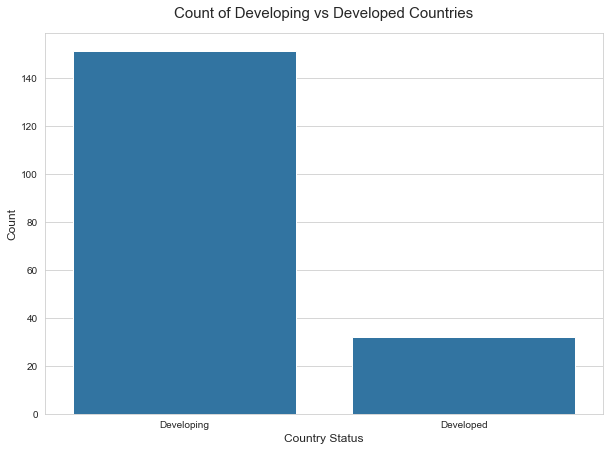

In [63]:
# Plotting the proportions in a barplot
plt.rcParams['figure.figsize'] = 10, 7

sns.barplot(x = country_status.index, y= country_status.values, data = life_expectancy, color = base)
plt.xticks([0, 1], ['Developing', 'Developed'])
plt.title('Count of Developing vs Developed Countries', fontsize = 15, y=1.025)
plt.xlabel('Country Status', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

The proportion of developed countries is much smaller than than developing ones. While there are a little over 160 developing countries covered in the dataset, only 32 are developed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Life expectancy has generally increased over the 15 years covered in the dataset with values between 75 and 80 years having the highest counts. Low values of adult mortality also have the highest counts, but there are a significant number of occurrences of mortality rates as high as 500 people per 1000. Infant mortality, on the other hand, has a very low count of occurrences beyond 200, so I needed to apply a log transformation to view those outliers. Examining the data with high infant deaths showed that all of the values equal to or greater than 1000 deaths were from a single country - India.

> The distribution of percentage expenditure and GDP per capita also had a number of outliers that became visible on a log-transformed scale. Both `percentage_expenditure` and `gdp` had high correlationn with life expectancy, hinting at the possibility of a strong effect during bivariate exploration.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During the wrangling phase, I converted the `status` column to a dummy variable with numerical values of 0 and 1. This conversion helped me to access summary statistics on the data, such as retrieving the mean of developed countries, without needing any further transformation during exploration.
The distribution of countries with the 20 lowest GDPs was unusual in that they were all African countries. However, determining whether the geographical location is a strong correlant with life expectancy will require more data.

## Bivariate Exploration

First, I will explore the impact of the outliers from `percentage_expenditure` and `infant_death` on the life expectancies in those countries.

### Question: Given the high number of infant deaths, does the life expectancy of India differ from the overall average?

In [64]:
# Checking the correlation of infant death with life expectancy

life_expectancy['life_expectancy'].corr(life_expectancy['infant_deaths'])

-0.1965571766552617

There is a moderately strong negative correlation, so I expect that the life expectancy in India will be lower than the general value.

In [65]:
# Subsetting India's life expectancy data

life_expectancy['is_india'] = life_expectancy['country'] == 'India'
life_expectancy['is_india'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_india, dtype: bool

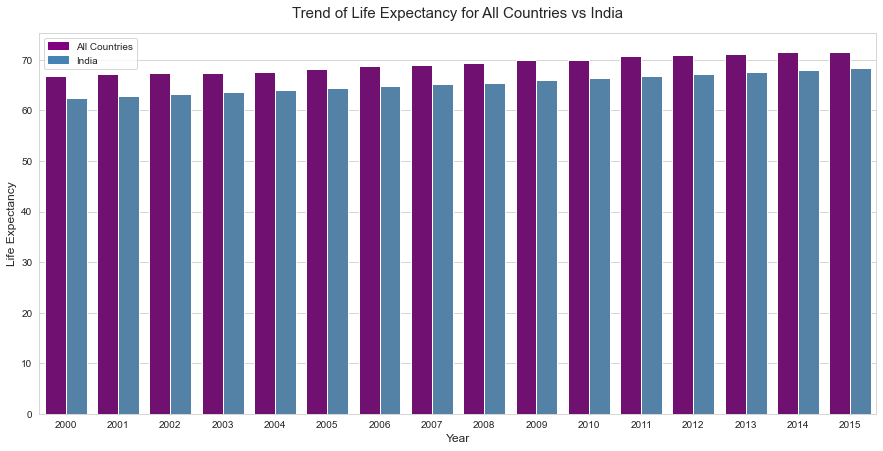

In [66]:
# Plotting the general expectancy vs India's expectancy
plt.rcParams['figure.figsize'] = 15, 7

sns.barplot(data = life_expectancy, x = 'year', y = 'life_expectancy', hue = 'is_india', ci = False, palette = ['purple', 'steelblue'])
plt.title('Trend of Life Expectancy for All Countries vs India', fontsize = 15, y=1.025)
plt.ylabel('Life Expectancy', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
other_legend = mpatches.Patch(color = 'purple', label = "All Countries")
india_legend = mpatches.Patch(color = 'steelblue', label = "India")
plt.legend(handles = [other_legend, india_legend]);

While the life expectancy trend in India has steadily increased in the same manner as the general trend, the actual values are up to 4 years lower than the overall average throughout the time covered by the dataset.

### Question: Do countries with such high percentages of health expenditure to GDP have a higher life expectancy?

In [67]:
# Checking the correlation of percentage health expenditure with life expectancy

life_expectancy['life_expectancy'].corr(life_expectancy['percentage_expenditure'])

0.3818635033900497

In [68]:
# Subsetting entries with % healthcare expenditure over 10000%

high_he = life_expectancy.query('percentage_expenditure > 10000')
high_he['country'].value_counts()

Switzerland    8
Luxembourg     7
Australia      4
Denmark        4
Norway         4
Iceland        2
Sweden         2
Netherlands    1
New Zealand    1
Name: country, dtype: int64

In [69]:
life_expectancy['high_he'] = life_expectancy['country'].isin(high_he['country'])
life_expectancy['high_he'].head()

0    False
1    False
2    False
3    False
4    False
Name: high_he, dtype: bool

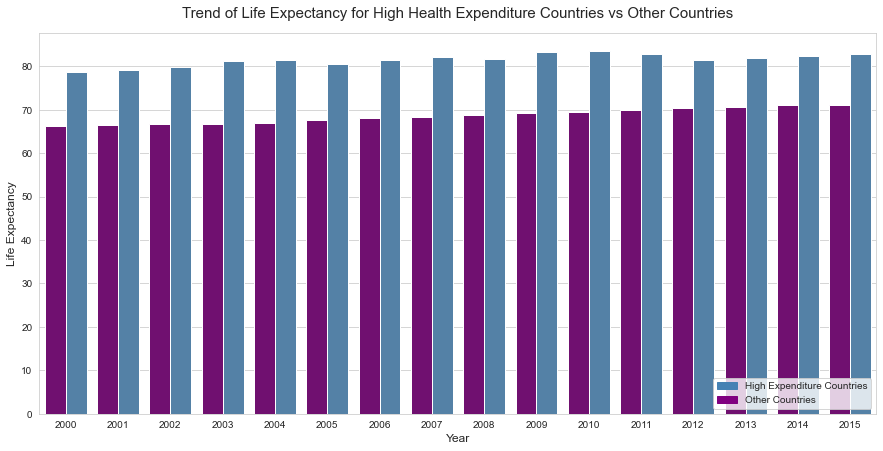

In [70]:
# Creating a barplot of the life expectancy

sns.barplot(data = life_expectancy, x = 'year', y = 'life_expectancy', hue = 'high_he', ci = False, palette = ['purple', 'steelblue'])
plt.title('Trend of Life Expectancy for High Health Expenditure Countries vs Other Countries', fontsize = 15, y=1.025)
plt.ylabel('Life Expectancy', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
other_legend = mpatches.Patch(color = 'purple', label = "Other Countries")
high_he_legend = mpatches.Patch(color = 'steelblue', label = "High Expenditure Countries")
plt.legend(loc = 'lower right', handles = [high_he_legend, other_legend]);

In [71]:
# Dropping the dummy variables

life_expectancy.drop(columns = ['is_india', 'high_he'], inplace = True)

The percentage of health expenditure as a ratio of GDP per capita has a strong correlation with life expectancy. As predicted by the strength of the correlation, countries that invest a higher percentage on health expenditure as compared to their GDP per capita have higher life expectancies.

### Question - Is the life expectancy trend different for developing and developed countries?

The correlation matrix has shown a fairly strong developmental status between the developmental status of a country and its life expectancy. However, does the status affect how the life expectancy changes over the years?

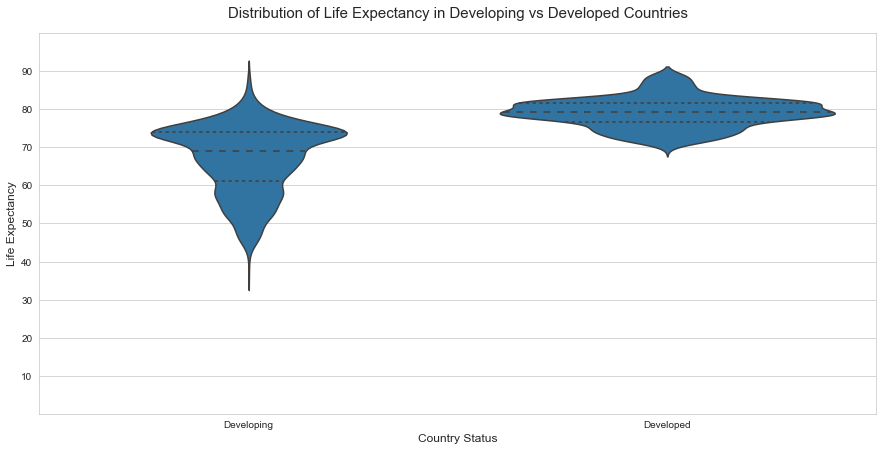

In [72]:
# Plotting the distributions in a violinplot
xticks = [0, 1]
xlabels= ['Developing', 'Developed']
yticks = np.arange(10, 100, 10)
ylabels = ['{}'.format(val) for val in yticks]

sns.violinplot(data = life_expectancy, y ='life_expectancy', x = 'is_developed', color = base, inner = 'quartile')
plt.title('Distribution of Life Expectancy in Developing vs Developed Countries', fontsize = 15, y=1.025)
plt.ylim(0, 100)
plt.ylabel('Life Expectancy', fontsize = 12)
plt.xlabel('Country Status', fontsize = 12)
plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels);

The violinplots show a wide range of life expectancy values from as low as 35 years to over 90 years for developing countries. The distribution is slightly similar to a normal one with wide tails. The 25th percentile is fairly high at 60 years, with the median and 75th percentile following closely at 70 and 75 years respectively </br>

Developed countries, on the other hand, have a much smaller range of life expectancy ranging between 70 to 90 years. The distribution has multiple peaks, and the 25th, 50th and 75th quartile are all between 75 and 85 years.</br>

The outliers of life expectancy from developing countries are much higher than the maximum values from developed countries, making them even more interesting. I'll investigate those values and the variables for those countries. 

### Question: What are the features of developing countries with high life expectancy?

In [73]:
le_dev = life_expectancy.query('is_developed == 0 & life_expectancy >= 80')
le_dev.country.unique()

array(['Canada', 'Chile', 'Finland', 'France', 'Greece', 'Israel',
       'Republic of Korea'], dtype=object)

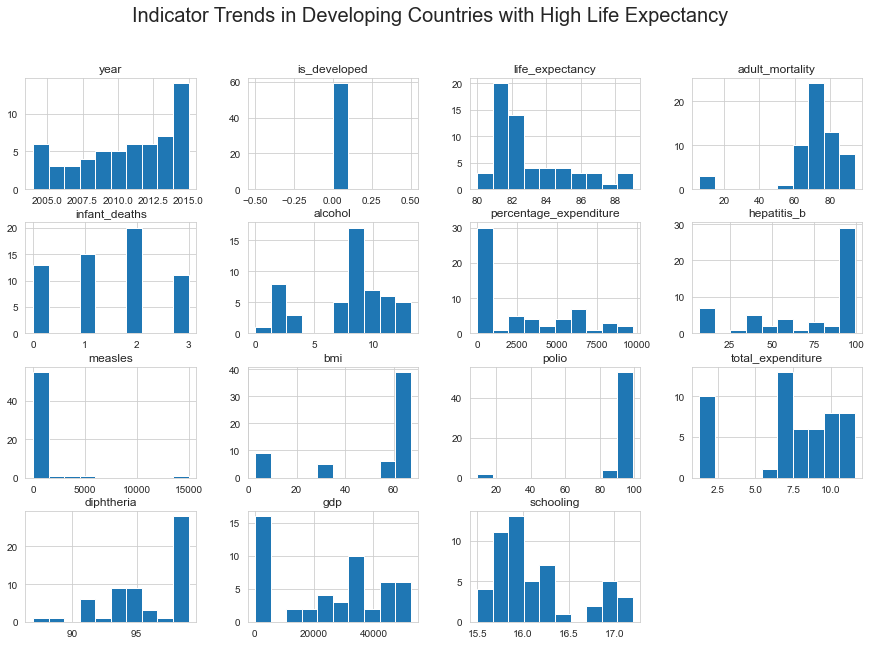

In [74]:
plt.rcParams['figure.figsize'] = 15,10
le_dev.hist()
plt.xlim(0)
plt.suptitle('Indicator Trends in Developing Countries with High Life Expectancy', fontsize = 20);

Canada, Chile, Finland, France, Greece, Israel, and the Republic of Korea are developing countries with life expectancy greater than 80 years, with most of them being between 81 and 83 years. True to their high life expectancy, all of these countries have less than 100 adults dying per 1000 people, and a maximum of 3 infant deaths per 100,000 children.</br>

While all of these countries have moderate GDPs per capita no higher than 60,000, their percentage expenditure on health per GDP is surprisingly moderate as well. However, potential explanations for the life expectancy may lie in the low alcohol consumption and measles occurrences, as well as the high overal years of schooling and rates of immunization against diphtheria and polio.

### Question - What is the correlation of life expectancy with other variables?

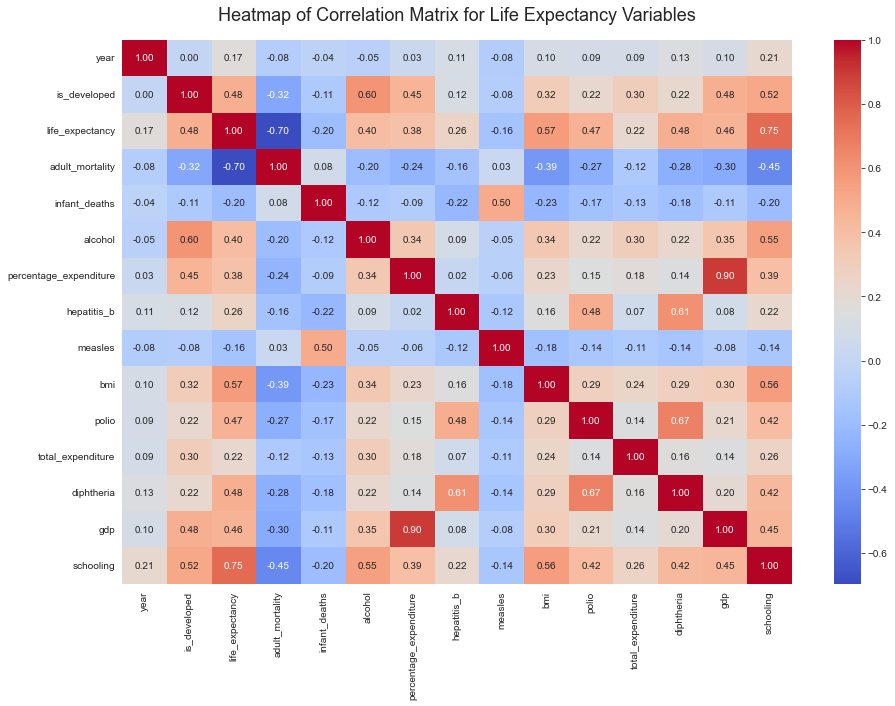

In [75]:
# Plotting a heatmap of the correlation matrix

plt.rcParams['figure.figsize'] = 15,10
sns.heatmap(life_expectancy.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Heatmap of Correlation Matrix for Life Expectancy Variables', fontsize = 18, y=1.025);

The heatmap shows that the strongest correllants with life_expectancy are schooling, bmi values, developed status, diphtheria and polio immunization, as well as gdp with strong postive correlations. Adult mortality also has a strong negative correlation with life expectancy. </br>

To prove that there is no bias based on country status, all of these values aside from `schooling` have very weak correlations with the `is_developed` indicator. I will now create a smaller heatmap of these variables that strongly correlate with life expectancy and other related ones.

In [84]:
# Subsetting the strong correlants

le_hmap = life_expectancy[['life_expectancy', 'is_developed', 'schooling',
                           'bmi','diphtheria', 'polio', 'gdp', 'adult_mortality']]
le_hmap.head()

,life_expectancy,is_developed,schooling,bmi,diphtheria,polio,gdp,adult_mortality,total_expenditure
0,65.0,0,10.1,19.1,65.0,6.0,584.259210,263.0,8.16
1,59.9,0,10.0,18.6,62.0,58.0,612.696514,271.0,8.18
2,59.9,0,9.9,18.1,64.0,62.0,631.744976,268.0,8.13
3,59.5,0,9.8,17.6,67.0,67.0,669.959000,272.0,8.52
4,59.2,0,9.5,17.2,68.0,68.0,63.537231,275.0,7.87


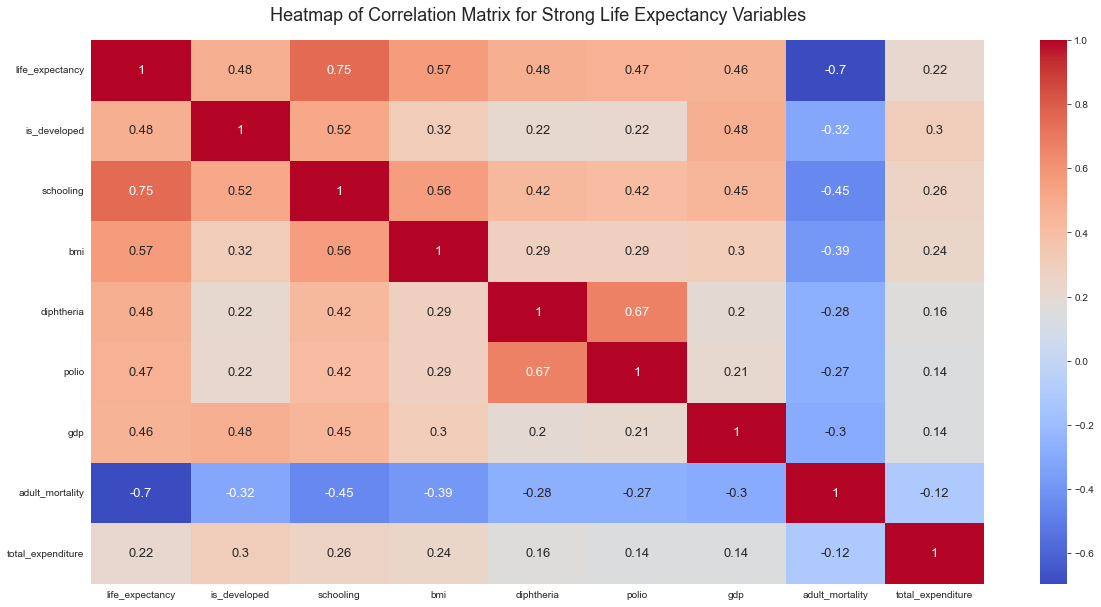

In [85]:
# Plotting a heatmap of the subset

sns.heatmap(le_hmap.corr(), annot = True, annot_kws = {'fontsize': 13}, cmap = 'coolwarm')
plt.title('Heatmap of Correlation Matrix for Strong Life Expectancy Variables', fontsize = 18, y=1.025);

The heatmap shows similar findings to the earlier one - countries with high life expectancy typically have high GDPs per capita, high average years of schooling and low rates of adult mortality. The countries are also more likely to be developed, while their residents generally have higher Body Mass Indexes and higher rates of immunization against Polio and Diphtheria.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The bivariate exploration surprisingly showed that the strongest correlant with life expectancy was schooling - a feature almost entirely unrelated to health. The strength of this relationship was further proven by developing countries with high years if schooling and life expectancies above 80 years, in spite of their classification as non-developed countries. </br>
While positive health trends such as immunization had moderately strong correlations with life expectancy, negative ones like measles prevalence had a very weak correlation while adult mortality has a much stronger effect.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Alcohol intake appears to have a strong correlation with the developmental status of a country and a slightly weaker relationship a seemingly counter-intuitive relationship with life expectancy and indicators like schooling. This relationship brings up the question - does informed alcohol intake have a non-negative effect on life expectancy?

## Multivariate Exploration

I will subset the strongest variables, excluding the immunization indicators and negative corellants such as `adult_mortality`, and group them by the developmental status to check for any difference in correlation.

### Question: Are correlations with life expectancy any stronger or weaker for developing/developed countries?

In [78]:
le_hmap.drop(columns = ['polio', 'diphtheria', 'adult_mortality'], inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_5360\1208269494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_hmap.drop(columns = ['polio', 'diphtheria', 'adult_mortality'], inplace = True)


In [79]:
dev_hmap = le_hmap.groupby('is_developed').corr()
dev_hmap

life_expectancy  schooling       bmi       gdp
is_developed                                                                
0            life_expectancy         1.000000   0.688119  0.555682  0.389506
             schooling               0.688119   1.000000  0.541806  0.381129
             bmi                     0.555682   0.541806  1.000000  0.342699
             gdp                     0.389506   0.381129  0.342699  1.000000
1            life_expectancy         1.000000   0.395210 -0.043962  0.353451
             schooling               0.395210   1.000000  0.119754  0.156656
             bmi                    -0.043962   0.119754  1.000000 -0.039131
             gdp                     0.353451   0.156656 -0.039131  1.000000

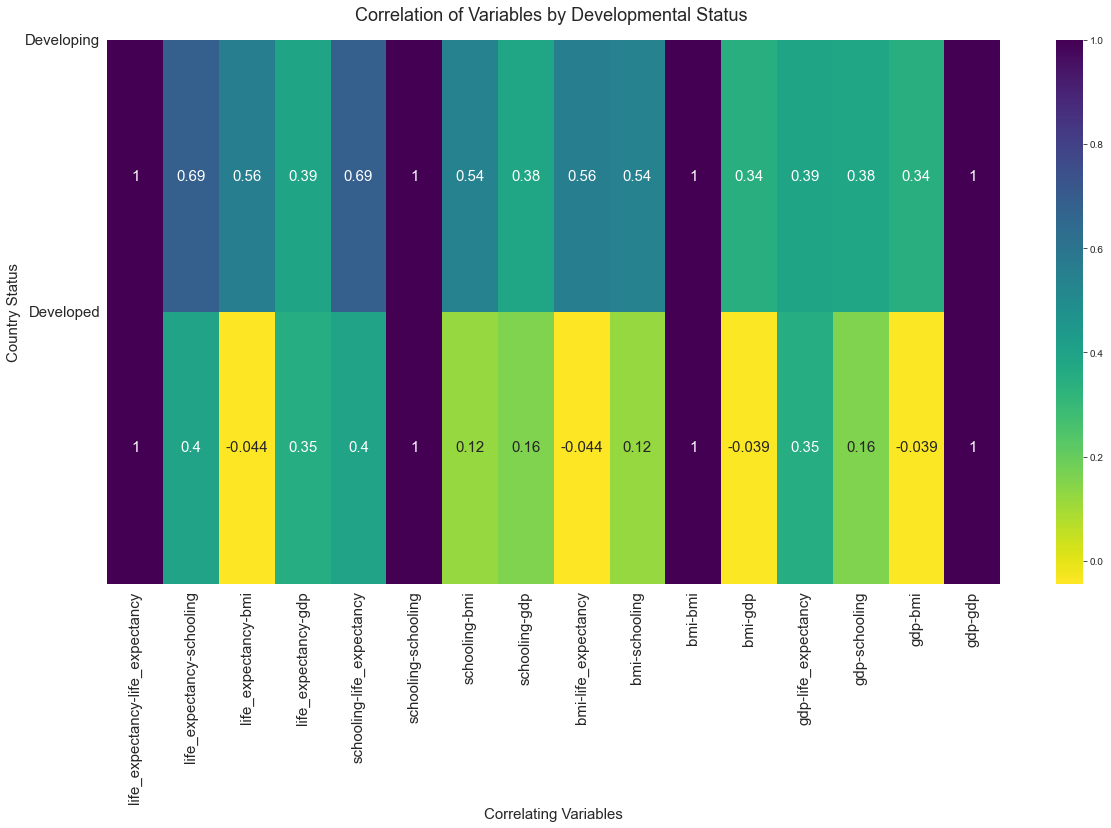

In [80]:
plt.rcParams['figure.figsize'] = 20, 10
sns.heatmap(dev_hmap.unstack(), annot = True, annot_kws = {'fontsize': 15}, cmap = 'viridis_r')
plt.title('Correlation of Variables by Developmental Status ', fontsize = 18, y=1.025)
plt.xlabel('Correlating Variables', fontsize = 15)
plt.ylabel('Country Status', fontsize = 15)
plt.yticks([0, 1], ['Developing', 'Developed'], ha='right', rotation=0, fontsize = 15)
plt.xticks(fontsize = 15);

There seems to be a significant difference between the correlations of life expectancy and average BMI for developing and developed countries. I'll explore that further using a scatterplot.

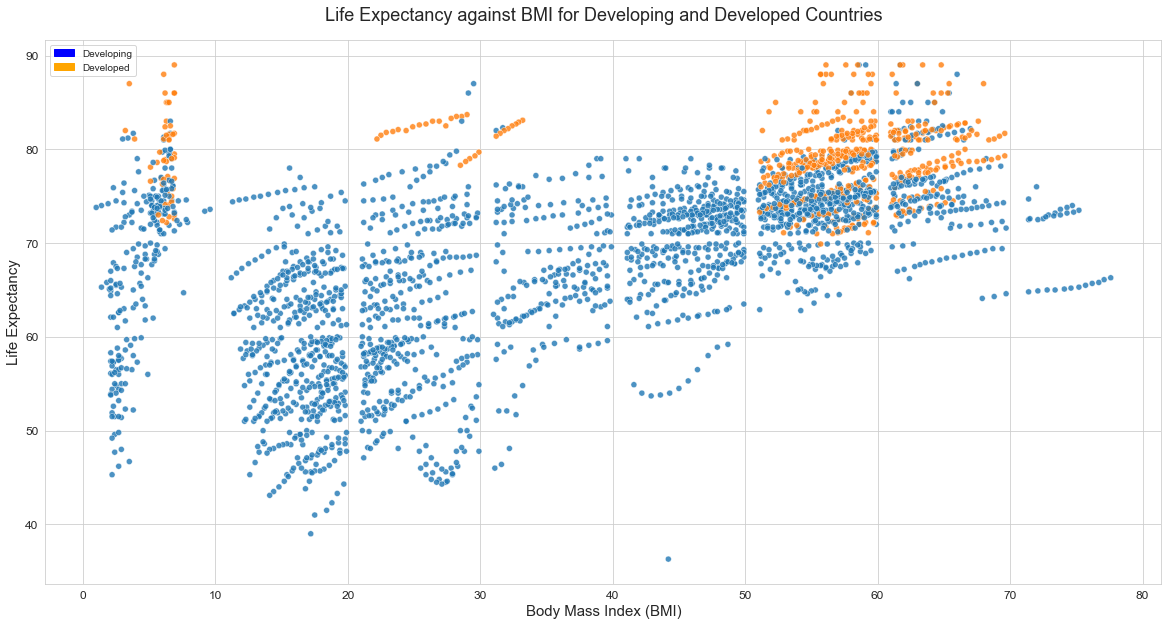

In [81]:
# Visualising the life expectancy per BMI


sns.scatterplot(x = 'bmi', y = 'life_expectancy', hue = 'is_developed', data = life_expectancy, alpha = 0.8)

plt.title('Life Expectancy against BMI for Developing and Developed Countries', fontsize = 18, y=1.025)
plt.ylabel('Life Expectancy', fontsize = 15)
plt.xlabel('Body Mass Index (BMI)', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
developing_legend = mpatches.Patch(color = 'blue', label = 'Developing')
developed_legend = mpatches.Patch(color = 'orange', label = 'Developed')
plt.legend(handles = [developing_legend, developed_legend], loc = 'upper left');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It appears that the indicators have a stronger correlation with life expectancy and other positive variables in developing countries than in developed ones. The sharpest of these differences is in the average BMI, which has a strong positive correlation with life expectancy in developed countries and a weak negative correlation in developed ones.
A possible explanantion for this might be the higher tendency for extremites of starvation causing low BMIs or obesity causing high BMI, both of which are unhealthy health situations.

### Were there any interesting or surprising interactions between features?

> The earlier bivariate exploration already showed that the average life expectancy for developing countries are lower than developed ones. However, the scatterplot showed more clearly that for countries with extremely low or high BMIs, the life expectancy of developed countries is higher than developed ones. Developed countries also have higher expectancies than developing ones in the moderate BMI range, but the proportion seems much smaller.

Based on these findings, a potentially interesting question might be an exploration of the basis for the classification of countries as developed or developing.

## Conclusions
The main findings from my exploration were:
1. Life expectancy has generally increased over the 15 years covered in this dataset, with higher overall expectancies for developed countries than developing ones. Most developing countries had life expectancies of about 75 years, while most developed countries has about 80 years.
2. Despite the disparity in status, 7 developing countries attained life expectacies above 80-years, the median value for developed countries. These nations had high average years of schooling and rates of immunization against polio and diphtheria.
3. The countries with the highest life expectancy are Japan, Sweded, Iceland, Switzerland and France, while those with the lowest average life expectancy are Sierra Leone, Central African Republic, Lesotho, Angola, and Malawi.
4. The strongest correlant with life expectancy is the average number of years of schooling. Other major correllants are adult mortality rates, BMI, GDP per capita and developmental status. However, there is a stark difference in the influence of BMI on life expectancy for developing and developed countries, especially for countries with average BMIs lower than 10 or higher than 50.